# Importing Dependencies


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [36]:
#Dataset
pd.set_option("display.max_columns",None)
df = pd.read_csv("creditcard.csv")
df.tail(100)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284707,172700.0,-0.682255,1.071898,-0.023906,-0.738242,0.600906,-0.729368,0.626959,0.336486,-0.342863,-0.721120,-1.261431,0.100113,-0.033071,0.484007,-0.377801,0.032807,-0.272865,-0.580114,0.065677,-0.054008,-0.190374,-0.594392,0.078914,0.658295,-0.552961,0.107366,0.226084,0.156534,1.50,0
284708,172701.0,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,1.206863,0.611617,-0.589935,-0.529698,-0.450015,0.483411,0.321520,0.192470,0.275352,-0.184898,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284709,172703.0,0.081339,1.014673,-0.106095,-0.421918,0.720847,-0.914371,1.107958,-0.268971,-0.212855,-0.333443,-0.409182,0.588378,0.979230,0.233544,0.409205,-0.625311,-0.371334,-0.132220,-0.163855,0.066089,0.407356,1.457682,-0.048590,1.153250,-0.797593,-0.276889,0.514156,0.334811,7.99,0
284710,172703.0,2.141611,-0.969139,-0.652944,-0.902773,-0.821081,-0.264356,-0.970697,-0.087421,-0.008249,0.692198,-0.752591,-0.060035,1.163185,-0.679609,0.174043,1.113692,0.071130,-1.272342,0.419949,0.087368,0.335043,1.032939,0.136960,0.665397,-0.104844,-0.115775,0.011380,-0.037789,29.00,0
284711,172704.0,-1.034517,0.015312,-0.870533,-4.267054,2.062860,3.145858,-0.215357,1.462706,1.167351,-2.132953,-0.307154,0.661705,-0.289781,0.388489,0.440528,0.086353,-0.743689,-0.279581,-0.679592,-0.006052,-0.095626,-0.484040,0.221399,0.662252,-0.425485,-0.780724,0.285122,0.147288,58.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,8.176030e-16,1.206296e-15,4.913003e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing

In [5]:
#checking the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

 This shows that it is highly imbalaced dataset

In [7]:
legit = df[df.Class == 0]
fraud = df[df.Class != 0]

In [8]:
legit.shape

(284315, 31)

In [9]:
fraud.shape

(492, 31)

In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
#comparing the values between these two classs
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


under Sampling Build a sample dataset containing similar distribution fo normal transcation and Fraudulent Transactions

In [13]:
legit_sample = legit.sample(n=492)

In [14]:
legit_sample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131399,79585.0,-2.114715,-0.030207,0.110926,-0.729904,1.715410,-0.105742,0.724893,0.218082,-0.679755,-0.150732,0.376444,0.853757,0.956292,0.310167,-0.220575,0.522334,-0.998529,-0.391103,0.072725,-0.218929,-0.415469,-0.850597,0.401193,-1.340406,0.025689,0.044947,-0.138926,-0.147731,40.90,0
280402,169509.0,2.078230,-1.137457,-0.845761,-1.047547,-0.646595,0.053609,-0.957859,-0.099088,-0.063734,0.686048,-1.175599,-0.034294,1.952261,-0.813355,0.519832,1.562368,-0.399956,-0.842807,0.536954,0.281372,0.405617,1.089820,-0.005804,0.113383,-0.061172,-0.068928,0.005683,-0.028652,87.50,0
279669,169018.0,1.885651,-1.945377,-0.036139,-1.110449,-2.412874,-1.242219,-1.215472,-0.220373,-0.948618,1.444719,-0.204139,-0.497349,0.178084,-0.516459,0.061067,-0.446189,0.707442,-0.324912,-0.566504,-0.150971,-0.204702,-0.474326,0.418604,0.869245,-0.786099,-0.516440,0.012413,0.002649,174.10,0
150145,92637.0,1.598056,-2.152447,0.748111,0.048633,-2.198002,0.782603,-1.912255,0.249854,2.817454,-0.132523,-0.344456,-2.205985,2.038191,-0.303035,-2.486798,0.540310,1.609742,-1.012502,0.420000,0.381397,0.299353,1.083521,0.021582,1.124557,-0.379070,-0.094423,0.027020,0.010094,232.25,0
229677,146014.0,0.124403,0.981350,-1.214924,-0.159391,0.360386,-0.921896,0.552781,0.296234,-0.317227,-1.005810,0.680085,0.149452,-0.633672,-0.318090,0.051949,0.566383,0.334803,1.447491,0.139236,-0.188004,0.364995,0.931584,-0.060036,-0.435763,-0.264619,-0.148462,-0.087147,-0.056811,42.81,0
244798,152492.0,-2.664849,-1.152360,0.257149,-2.735395,-1.680421,-0.076182,-0.238260,0.817320,-2.512750,0.403250,0.137938,0.153422,1.296086,-0.094508,-1.328463,0.278173,0.172643,0.616379,-0.549112,0.048470,-0.045901,-0.095220,-0.361055,-0.370744,0.764443,-0.122579,0.271374,-0.212613,259.50,0
281849,170461.0,-0.394739,0.175767,0.038996,-1.973004,-0.349474,-0.571406,-0.495585,0.577060,-0.963769,-0.874622,0.666678,-0.573029,-0.415512,-1.688917,-0.991187,2.303188,0.953244,0.215756,-0.220251,-0.057446,0.351127,0.751462,-0.202245,-0.522984,0.144876,-0.167048,-0.135234,-0.112592,24.99,0
179988,124329.0,2.171891,0.208566,-2.643391,0.339344,1.098194,-1.159521,0.926288,-0.520423,-0.086635,0.272081,-1.117757,-0.222629,-0.556972,0.900212,-0.111023,-0.729357,-0.162213,-0.588511,0.064704,-0.257527,0.239638,0.846081,-0.171168,0.503867,0.715838,0.713219,-0.127996,-0.091108,0.00,0
262910,160708.0,-1.558689,-0.946061,0.184972,-0.269200,0.839380,-1.655941,-0.253109,0.448172,0.415607,-1.153612,-1.477578,-0.272212,-1.532584,0.665485,-0.438549,-0.328579,0.139897,-0.352062,0.053314,0.132814,0.050672,-0.492399,-0.050148,-0.033778,0.147649,-0.089331,-0.140991,-0.338711,34.66,0
72047,54543.0,1.338790,0.609689,-0.801073,0.632847,0.502523,-0.921439,0.407969,-0.288660,-0.167635,-0.608651,-0.563480,-0.122140,0.532287,-1.152357,0.950194,0.682253,0.485199,0.358448,-0.010508,-0.022122,-0.188216,-0.460512,-0.188072,-0.530400,0.698054,0.419278,-0.032227,0.029076,0.76,0


concatinating both legit_sample and fraud data in order to make a balanced dataset

In [15]:
new_df = pd.concat([legit_sample, fraud], axis=0)

In [38]:
new_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

now the  dataset is balanced

In [18]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,93923.040650,-0.055751,-0.188240,0.108939,0.085364,-0.060620,-0.014990,-0.038741,-0.126840,-0.024067,0.005374,-0.091037,-0.027727,-0.029872,-0.028856,0.008458,0.029688,0.019044,0.027050,-0.009740,0.103645,-0.070205,-0.017996,0.019842,0.026109,0.028554,0.022509,-0.036500,-0.001854,114.937764
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset

# Feature Selection

In [19]:
X = new_df.drop(columns = "Class", axis =1)

In [20]:
Y = new_df["Class"]

In [21]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
131399,79585.0,-2.114715,-0.030207,0.110926,-0.729904,1.715410,-0.105742,0.724893,0.218082,-0.679755,-0.150732,0.376444,0.853757,0.956292,0.310167,-0.220575,0.522334,-0.998529,-0.391103,0.072725,-0.218929,-0.415469,-0.850597,0.401193,-1.340406,0.025689,0.044947,-0.138926,-0.147731,40.90
280402,169509.0,2.078230,-1.137457,-0.845761,-1.047547,-0.646595,0.053609,-0.957859,-0.099088,-0.063734,0.686048,-1.175599,-0.034294,1.952261,-0.813355,0.519832,1.562368,-0.399956,-0.842807,0.536954,0.281372,0.405617,1.089820,-0.005804,0.113383,-0.061172,-0.068928,0.005683,-0.028652,87.50
279669,169018.0,1.885651,-1.945377,-0.036139,-1.110449,-2.412874,-1.242219,-1.215472,-0.220373,-0.948618,1.444719,-0.204139,-0.497349,0.178084,-0.516459,0.061067,-0.446189,0.707442,-0.324912,-0.566504,-0.150971,-0.204702,-0.474326,0.418604,0.869245,-0.786099,-0.516440,0.012413,0.002649,174.10
150145,92637.0,1.598056,-2.152447,0.748111,0.048633,-2.198002,0.782603,-1.912255,0.249854,2.817454,-0.132523,-0.344456,-2.205985,2.038191,-0.303035,-2.486798,0.540310,1.609742,-1.012502,0.420000,0.381397,0.299353,1.083521,0.021582,1.124557,-0.379070,-0.094423,0.027020,0.010094,232.25
229677,146014.0,0.124403,0.981350,-1.214924,-0.159391,0.360386,-0.921896,0.552781,0.296234,-0.317227,-1.005810,0.680085,0.149452,-0.633672,-0.318090,0.051949,0.566383,0.334803,1.447491,0.139236,-0.188004,0.364995,0.931584,-0.060036,-0.435763,-0.264619,-0.148462,-0.087147,-0.056811,42.81


In [22]:
Y.head()

131399    0
280402    0
279669    0
150145    0
229677    0
Name: Class, dtype: int64

In [23]:
#splitting the dataset into training and  testing sets
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y , random_state =2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([0.14818007, 0.2060386 , 0.31237901, 0.34604764, 0.34378847,
       0.1828119 , 0.16130956, 0.29634001, 0.15580085, 0.20333082,
       0.43827077, 0.40186317, 0.40235479, 0.02778203, 0.46827227,
       0.01674892, 0.3453441 , 0.44512353, 0.21326204, 0.10907696,
       0.10565979, 0.23879774, 0.03176451, 0.07438178, 0.03761396,
       0.02507634, 0.03184684, 0.24900614, 0.19574797, 0.14722021])

In [28]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.468272
V17       0.445124
V10       0.438271
V12       0.402355
V11       0.401863
V3        0.346048
V16       0.345344
V4        0.343788
V2        0.312379
V7        0.296340
V27       0.249006
V21       0.238798
V18       0.213262
V1        0.206039
V9        0.203331
V28       0.195748
V5        0.182812
V6        0.161310
V8        0.155801
Time      0.148180
Amount    0.147220
V19       0.109077
V20       0.105660
V23       0.074382
V24       0.037614
V26       0.031847
V22       0.031765
V13       0.027782
V25       0.025076
V15       0.016749
dtype: float64

<AxesSubplot:>

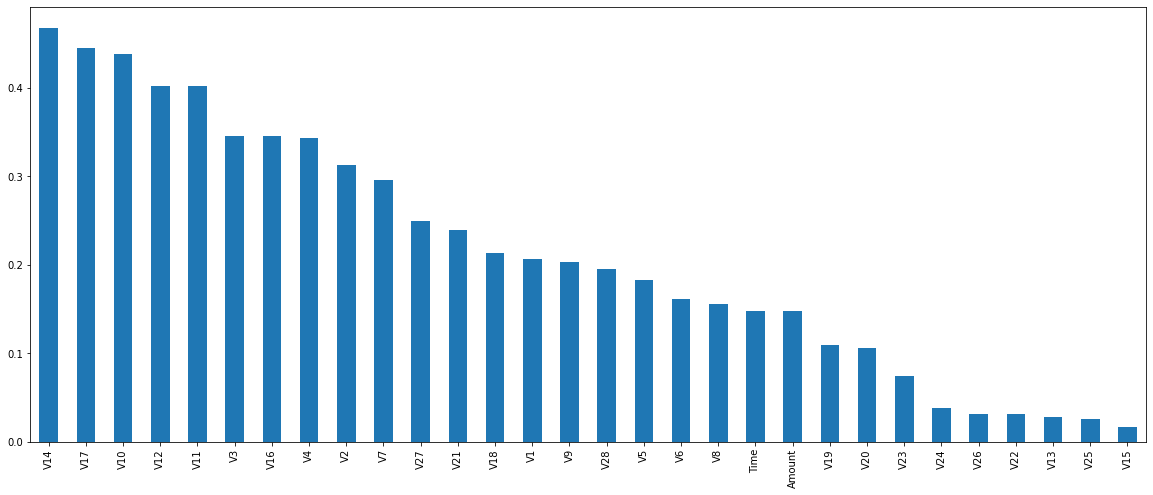

In [29]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [30]:
from sklearn.feature_selection import SelectKBest

In [31]:
#Here we will be selecting top 20 features
sel_five_cols= SelectKBest(mutual_info_classif, k=21)
sel_five_cols.fit(X_train,Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V21', 'V27', 'V28',
       'Amount'],
      dtype='object')

Following are the features that are important for our model training

In [32]:
#Dropping unwanated features
X_train.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1 , inplace= True)


c:\users\sandeep\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
X_train.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,-1.769060,-0.651414,-0.005423,0.217470,-1.173978,0.243347,-0.342301,0.042619,0.150606,-0.117140,549.06
93599,64504.0,-0.819922,1.160297,1.373074,-0.351696,0.150473,-0.403674,0.742020,-0.065506,-0.010767,0.703035,1.036615,0.138520,0.088626,0.398428,-0.853159,0.265902,-0.318757,0.302832,0.018663,9.99
111560,72274.0,1.079332,0.020016,0.192156,1.354287,-0.022262,0.048090,0.141180,-0.010796,0.298562,-0.152875,-0.845886,0.449166,0.043738,-0.613825,0.130659,-0.857362,-0.089931,0.029008,0.022526,65.76
124057,77161.0,1.219186,0.540365,-0.481236,0.815109,-0.018043,-1.273673,0.245565,-0.128400,-0.292272,-0.515250,1.907653,0.091303,-0.893085,0.733717,0.916252,0.815150,-0.100109,-0.040648,0.032657,0.76
198451,132498.0,2.110868,-0.989085,-1.704893,-1.148047,-0.213042,-0.512656,-0.378249,-0.233771,-0.710065,1.011680,0.237113,-0.191879,0.135723,1.395349,-0.468142,-0.453753,0.479958,-0.053220,-0.071867,83.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,1022.0,-1.837618,0.274207,0.014413,-0.589063,-0.642114,0.320031,0.423555,0.932501,-0.228443,-1.167004,-0.746477,-0.024637,0.816854,0.734555,-0.425924,0.519976,-0.103404,-0.170206,-0.284619,158.00
174443,121914.0,-1.236219,0.511326,0.764564,-0.922678,0.594570,1.873099,-0.404454,1.142217,0.454988,-0.926892,-1.129292,-0.225549,0.178204,-0.693305,0.643852,-1.419915,0.338678,0.151286,0.101648,21.80
223618,143456.0,-2.006582,3.676577,-5.463811,7.232058,-1.627859,-0.996755,-4.299833,2.268867,-3.651067,-4.400930,4.213213,-5.737815,-8.893726,-3.281784,-4.368986,-0.736734,0.713907,0.485864,-0.042393,1.00
43061,41353.0,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,-15.124163,6.037666,-11.676722,-12.381606,-9.484143,-19.671881,-7.643273,2.525115,-1.310888,-0.707403,34.12


# Model training

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

lets first check the accuracy of training data

In [54]:
X_train_pred = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [55]:
#accuracy of training data
print(train_data_accuracy)

0.9466327827191868


In [56]:
#Removing the unwanted features from the test set
X_test.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1, inplace= True)

c:\users\sandeep\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Model Testing

In [57]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [58]:
print(test_data_accuracy)

0.9441624365482234


In [59]:
import pickle

In [60]:
with open('Credit_Card_pickle','wb') as f:
    pickle.dump(model,f)

In [61]:
with open('Credit_Card_pickle','rb') as f:
    classifier = pickle.load(f)

In [62]:
Time=1.56738000e+05 
v1= 2.05177897e+00 
v2=2.49040678e-02 
v3=-1.82775529e+00
v4=2.42284099e-01
v5= 5.25845178e-01 
v6=-4.11303003e-01 
v7= 6.99788939e-03
v9 =-1.23070379e-02 
v9=  4.09845334e-01 
v10=-1.78859187e-01 
v11=6.91279519e-01
v12=1.92218198e-01
v13 =-9.93990945e-01
v14 =-4.61431939e-01
v15 =-3.61058254e-01
v16=6.47275066e-01 
v17=  1.73759260e-01 
v18= 4.10098799e-01 
v19=4.60795739e-01
v20= -2.00548494e-01 
v21=-3.44039172e-01 
v22=-9.70790181e-01 
v23 = 3.02898193e-01
v24= 1.57715168e-01 
v25= -2.83502801e-01 
v26=  1.75958267e-01 
v27=-7.36481818e-02
v28=-4.57953374e-02 
Amount= 1.98000000e+00

In [64]:
y_pred= classifier.predict([[Time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v14,v16,v17,v18,v21,v27,v28,Amount]])

In [65]:
y_pred

array([0], dtype=int64)